In [126]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization, Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential

In [127]:
df = pd.read_csv('train.csv')

In [128]:
# Prepare input and target data
X = df['comment_text']
y = df[df.columns[2:]].values

In [129]:
MAX_FEATURES = 20000 
MAX_SEQ_LENGTH = 1800
BATCH_SIZE = 16

In [130]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=MAX_SEQ_LENGTH)
vectorizer.adapt(X.values)

In [131]:
model = Sequential([
    vectorizer,
    Embedding(MAX_FEATURES, 32),
    Bidirectional(LSTM(32, activation='tanh')),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(6, activation='sigmoid')
])

In [132]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [133]:
dataset = tf.data.Dataset.from_tensor_slices((X.values, y))
dataset = dataset.shuffle(len(df)).batch(BATCH_SIZE)

In [134]:
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size

In [135]:
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(train_size + val_size).take(test_size)

In [136]:
try:
    history = model.fit(train_dataset, epochs=1, validation_data=val_dataset)
    print("Training completed successfully.")
except Exception as e:
    print("An error occurred during training:", e)

6981/6981 ━━━━━━━━━━━━━━━━━━━━ 5723s 819ms/step - loss: 0.0832 - val_loss: 0.0485
Training completed successfully.


In [138]:
history.history

{'loss': [0.06275070458650589], 'val_loss': [0.04847010225057602]}

In [139]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

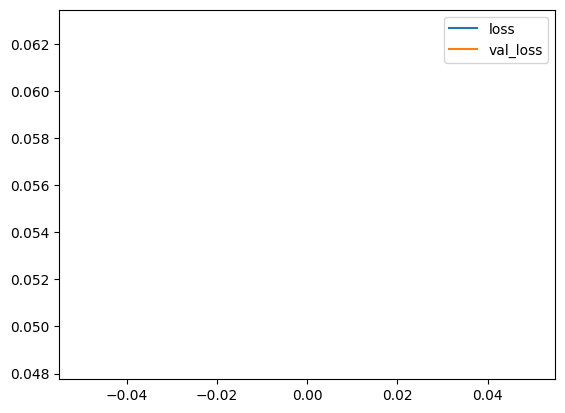

In [140]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()